**AJJAPALLY NITHISH REDDY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
df=pd.read_csv('/content/netflix_titles.csv')

#Problem Statement:
Examining Netflix content data to uncover trends in content type, genre preferences, country-wise production, and release patterns. The objective is to derive insights that can help understand content strategy, audience interests, and opportunities for expansion.

## Basic Trends
-Content Type Distribution
                            
-Genre Popularity

-Country-wise Content Production

-Release Year Trends

-Content Addition Over Time

-Duration Analysis

-Correlation Between Features

# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

## Basic Observations

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.show_id.nunique()

8807

##**Convert the dtypes**

In [ ]:
df['date_added']=df['date_added'].str.strip()

In [ ]:
type(df['date_added'].iloc[0])

str

Here the datatype of the column date_added is string ,so we have to convert them into datatime datatype

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='%B %d, %Y',errors='coerce')

Here the datatype of the column 'release_year' is int ,so we have to convert them into datatime datatype

In [ ]:
df['release_year']=pd.to_datetime(df['release_year'],format='%Y',errors='coerce')

similarly convert the dtypes of categorical cloumns in to category

In [ ]:
df['type']=df['type'].astype('category')
df['director']=df['director'].astype('category')
df['country']=df['country'].astype('category')
df['rating']=df['rating'].astype('category')
df['listed_in']=df['listed_in'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   category      
 4   cast          7982 non-null   object        
 5   country       7976 non-null   category      
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(5), datetime64[ns](2), object(5)
memory usage: 758.0+ KB


### Before handling missing values, first unnest the columns that contain multiple values within a single entry. This step is important for effective visualization.

#Unnesting the dataframe

-->For Cast Column

In [ ]:
df['cast']=df['cast'].str.split(', ')



In [ ]:
df=df.explode('cast',ignore_index=True)


--> For Country Column

In [ ]:
df['country']=df['country'].str.split(', ')

In [ ]:
df=df.explode('country',ignore_index=True)

--> For Director Column.

In [ ]:
df['director']=df['director'].str.split(",")

In [ ]:
df=df.explode('director',ignore_index=True)

In [ ]:
df=df

--> For Listed_in Column

In [ ]:
df['listed_in']=df['listed_in'].str.split(',')

In [ ]:
df=df.explode('listed_in',ignore_index=True)

#Handling the missing values

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2146
country,11897
date_added,158
release_year,0
rating,67
duration,3


-> HEre we can identify the missing values in the columns 'director',
 'cast', 'country', 'date_added', 'rating', 'duration'.

--> for 'director' column.

>For the "Director" column, I am replacing the null values with the most frequent director for the respective country. If the entry has an empty value in place of the country, I am replacing the null with "Unknown" values.

In [ ]:
director_counts = df.groupby('country')['director'].apply(lambda x:x.mode()[0] if not x.mode().empty else 'Unknown')


In [ ]:
def fill_missing_values(row):

    if pd.isna(row['director']):
        if pd.notna(row['country']):
            return director_counts.get(row['country'])
        else:
          return 'Unknown'

    return row['director']


In [ ]:
df['director'] = df.apply(fill_missing_values, axis=1)


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,2146
country,11897
date_added,158
release_year,0
rating,67
duration,3


--> for 'country' column

>For the "Country" column, I am replacing the null values with the first country associated with the respective director, or else keeping them as null if no director is available.

In [ ]:
director_to_country = df.groupby('director')['country'].first().to_dict()



In [ ]:
def fill_missing_country(row):
    if pd.isna(row['country']) and pd.notna(row['director']):
        country = director_to_country.get(row['director'])
        return country if country is not None else 'Unknown'
    else:
        return row['country']



In [ ]:
df['country'] = df.apply(fill_missing_country, axis=1)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,2146
country,0
date_added,158
release_year,0
rating,67
duration,3


--> for 'date_added' column.

> For the "Date Added" column, I have replaced the missing values using forward fill (ffill) and backward fill (bbfill) methods.

In [ ]:
df['date_added'].isna().sum()

158

In [ ]:
df['date_added']=df['date_added'].fillna(method='ffill')


<ipython-input-37-66fe9cd558c8>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added']=df['date_added'].fillna(method='ffill')


In [ ]:
df['date_added']=df['date_added'].fillna(method='bfill')

<ipython-input-38-0b4bd6faa366>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added']=df['date_added'].fillna(method='bfill')


In [ ]:
df['date_added'].isna().sum()

0

--> for 'cast' column

>For the "Cast" column, I have replaced the missing values with the director's most frequent cast, and if no frequent cast is available, I have replaced them with "unknown."

In [ ]:
cast_counts=df.groupby('director')['cast'].apply(lambda x:x.mode()[0] if not x.mode().empty else 'Unknown')


In [ ]:
def fill_missing_cast(row):
    if pd.isna(row['cast']):
        return cast_counts.get(row['director'])
    else:
         return row['cast']



In [ ]:
df['cast']=df.apply(fill_missing_cast,axis=1)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,67
duration,3


--> for 'rating' column

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,73867
TV-14,43931
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


>I noticed some irrelevant values in the "Rating" column, such as "77min," "84min," and "66min." First, I will replace these values with NaN to clean the data.

In [ ]:
valid_ratings=['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR','TV-Y7-FV', 'UR']

In [ ]:
df['rating'] = df['rating'].apply(lambda x: x if x in valid_ratings else np.nan)


> For the "Rating" column, I will replace the missing values with the director's most frequent rating. If no frequent rating is available, I will replace them with "unknown."

In [ ]:
rating_counts=df.groupby('director')['rating'].apply(lambda x:x.mode()[0] if not x.mode().empty else 'Unknown')

In [ ]:
def fill_missing_rating(row):
    if pd.isna(row['rating']):
        return rating_counts.get(row['director'])
    else:
        return row['rating']

In [ ]:
df['rating']=df.apply(fill_missing_rating,axis=1)

In [ ]:
df['rating'].isna().sum()

0

--> for 'duration' coulumn

For the "Duration" column, I have two values: "min" for movies and "season1", "season2" for TV shows. To facilitate easier analysis, I will convert the durations into minutes and store them in another column. Then, I will drop the original "Duration" column.

>>>For TV shows, I am making a rough estimation where 1 season is assumed to have 10 episodes, and each episode is approximately 60 minutes long. Using this estimation, I will convert the duration of TV shows into minutes for better analysis.

In [ ]:
def convert_duration(row):
    if isinstance(row, str):
        if 'min' in row:
            return int(row.split(' ')[0])
        elif 'season' in row.lower():
            return int(row.split(' ')[0]) * 10 * 60
    return None

df['duration_in_mins'] = df['duration'].apply(convert_duration)



In [ ]:
df['duration_in_mins']=df['duration_in_mins'].astype('Int64')

>Now, I will fill the missing values in the duration column with the mean of the duration (in minutes) for movies and TV shows separately. This will ensure that the missing data is handled in a way that reflects the typical duration for each type.

In [ ]:
movies=df[df['type']=='Movie']

In [ ]:
movies_mean_duration=int(movies['duration_in_mins'].mean())

In [ ]:
movies['duration_in_mins']=movies['duration_in_mins'].fillna(movies_mean_duration)

<ipython-input-55-2b7d35f72cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_in_mins']=movies['duration_in_mins'].fillna(movies_mean_duration)


In [ ]:
tvshows=df[df['type']=='TV Show']

In [ ]:
tvshows_mean_duration=int(tvshows['duration_in_mins'].mean())


In [ ]:
tvshows['duration_in_mins']=tvshows['duration_in_mins'].fillna(tvshows_mean_duration)

<ipython-input-58-9aac0e4cb256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['duration_in_mins']=tvshows['duration_in_mins'].fillna(tvshows_mean_duration)


In [ ]:
merged_df=pd.concat([movies,tvshows])

In [ ]:
df=merged_df.sort_index()

In [ ]:
df.drop('duration',axis=1,inplace=True)

In [ ]:
df.rename({'duration_in_mins':'duration'},axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
listed_in,0


#Non-Graphical Analysis: Value counts and unique attributes .

In [ ]:
df['title'].nunique()

8807

^We have a total of 8,807 unique entries in the dataset

In [ ]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,5121
cast,36440
country,128
date_added,1714
release_year,74
rating,15
listed_in,73


--> Top directors who featured on netflix

>>"Here, I am using `unique_df` to store the unique values to avoid the duplication issues caused by unnesting."

In [ ]:
unique_df=df[['show_id','director']].drop_duplicates()

In [ ]:
unique_df[unique_df['director']!='Unknown']['director'].value_counts().head(20)

,count
director,
Martin Scorsese,952
Sarah Smith,268
Toshiya Shinohara,195
Bong Joon Ho,169
Robert Vince,134
David Dhawan,94
Thierry Donard,87
Clay Glen,69
Chen Rong-hui,64


--> Top actors who featured on netflix.

In [ ]:
unique_df=df[['show_id','type','cast']].drop_duplicates()

In [ ]:
unique_df[unique_df['cast']!='Unknown']['cast'].value_counts().head(20)

,count
cast,
Grey Griffin,160
Frederick Lee,102
David Attenborough,63
Anupam Kher,61
Julie Tejwani,36
Shah Rukh Khan,35
Takahiro Sakurai,35
Naseeruddin Shah,32
Rupa Bhimani,31


-->Top movie casts that appear on Netflix

In [ ]:
movies=unique_df[unique_df['type']=='Movie']

In [ ]:
movies[movies['cast']!='Unknown']['cast'].value_counts().head(20)

,count
cast,
Anupam Kher,44
Shah Rukh Khan,35
Naseeruddin Shah,32
Julie Tejwani,31
Om Puri,30
Akshay Kumar,30
Paresh Rawal,28
Amitabh Bachchan,28
Boman Irani,27


--> Top TV Show casts who appear on Netflix

In [ ]:
tvshows=unique_df[unique_df['type']=='TV Show']

In [ ]:
tvshows[tvshows['cast']!='Unknown']['cast'].value_counts().head(20)

,count
cast,
Grey Griffin,135
Frederick Lee,85
David Attenborough,50
Takahiro Sakurai,28
Yuki Kaji,19
Daisuke Ono,17
Junichi Suwabe,17
Ai Kayano,17
Anupam Kher,17


--> Top genres on Netflix

In [ ]:
unique_df=df[['show_id','listed_in']].drop_duplicates()

In [ ]:
unique_df['listed_in'].value_counts().head(10)

,count
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
International TV Shows,774
Independent Movies,736
TV Dramas,696


--> Top countries producing the content

In [ ]:
unique_df=df[['show_id','country']].drop_duplicates()

In [ ]:
unique_df['country'].value_counts().head(20)

,count
country,
United States,3725
India,1104
United Kingdom,808
Canada,447
Belarus,410
France,394
Japan,326
Unknown,272
Spain,234


--> The top ratings we have on Netflix

In [ ]:
unique_df=df[['show_id','rating']].drop_duplicates()

In [ ]:
unique_df['rating'].value_counts().head(20)

,count
rating,
TV-MA,3209
TV-14,2161
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


--> Number of movies/tvshows released per year

In [ ]:
unique_df=df[['show_id','release_year']].drop_duplicates()

In [ ]:
unique_df['release_year']=unique_df['release_year'].dt.year

In [ ]:
unique_df["release_year"].value_counts().head(20)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


--> content added per year

In [ ]:
unique_df=df[['show_id','date_added']].drop_duplicates()

In [ ]:
unique_df['date_added'].dt.year.value_counts().head(20)

,count
date_added,
2019,2017
2020,1879
2018,1652
2021,1498
2017,1193
2016,430
2015,82
2014,24
2011,13


# Visual Analysis - Univariate, Bivariate after pre-processing of the data

--> UNIVARIATE ANALYSIS

>Movies vs. TV Shows Count

In [ ]:
unique_df=df[['show_id','type']].drop_duplicates()

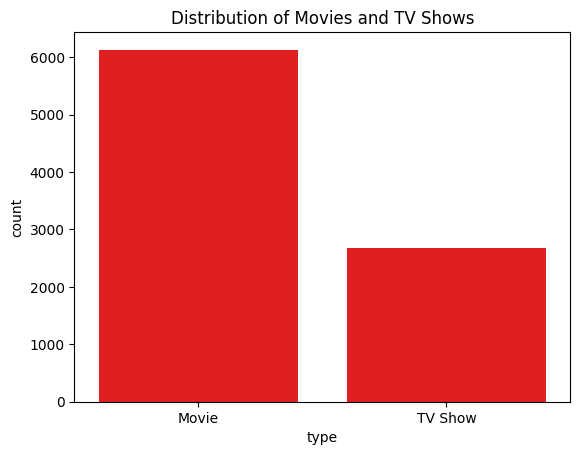

In [ ]:
sns.countplot(data=unique_df,x='type',color='red')
plt.title('Distribution of Movies and TV Shows')
plt.show()

^ **Insights**:The dataset reveals that Netflix has a significantly higher number of movies compared to TV shows, indicating a stronger emphasis on movies within its content library

--> propotion of movies and tvshowls

In [ ]:
moviesp=unique_df[unique_df['type']=='Movie']['type'].count()

In [ ]:
tvshowsp=unique_df[unique_df['type']=='TV Show']['type'].count()

In [ ]:
labels=[moviesp,tvshowsp]

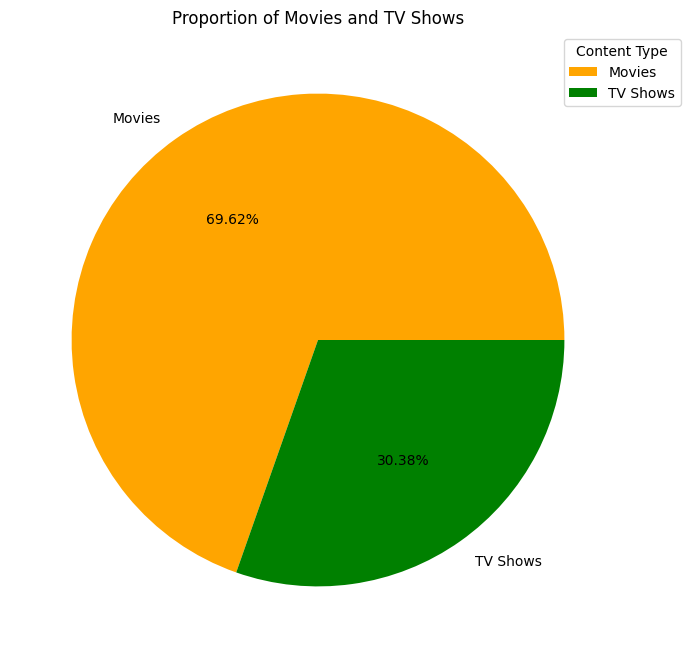

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(labels,labels=['Movies','TV Shows'],autopct='%1.2f%%',colors=['orange','green'])
plt.title('Proportion of Movies and TV Shows')
plt.legend(labels=['Movies','TV Shows'],title='Content Type',loc='upper right',bbox_to_anchor=(1.1,1))
plt.show()

plt.show()

--> Distribution of Ratings

In [ ]:
unique_rating=df[['show_id','rating']].drop_duplicates()

In [ ]:
top5_ratings =unique_rating['rating'].value_counts().head(5)

In [ ]:
df_top5=unique_rating[unique_rating['rating'].isin(top5_ratings.index)]

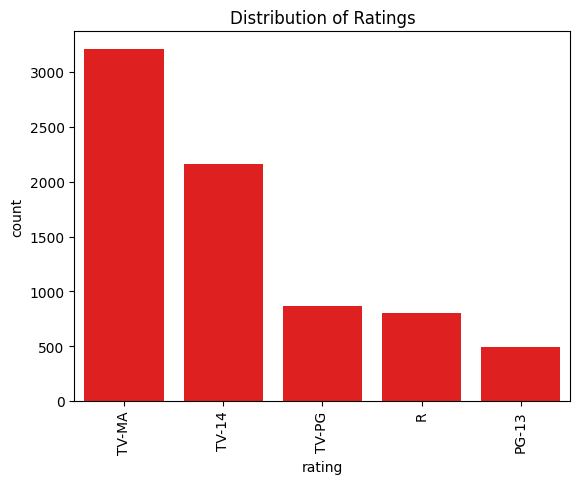

In [ ]:
sns.countplot(data=df_top5,x=df_top5['rating'],color='red',order=top5_ratings.index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=90)
plt.show()

^ **Insights**:The Top 5 ratings are TV-MA,TV-14,TV-PG,R,PG-13

-->Distribution of countries

In [ ]:
unique_country=df[['show_id','country']].drop_duplicates()

In [ ]:
top10=unique_country['country'].value_counts().head(10)

In [ ]:
df_top10=unique_country[unique_country['country'].isin(top10.index)]

In [ ]:
df_top10['country'].value_counts()

,count
country,
United States,3725
India,1104
United Kingdom,808
Canada,447
Belarus,410
France,394
Japan,326
Unknown,272
Spain,234


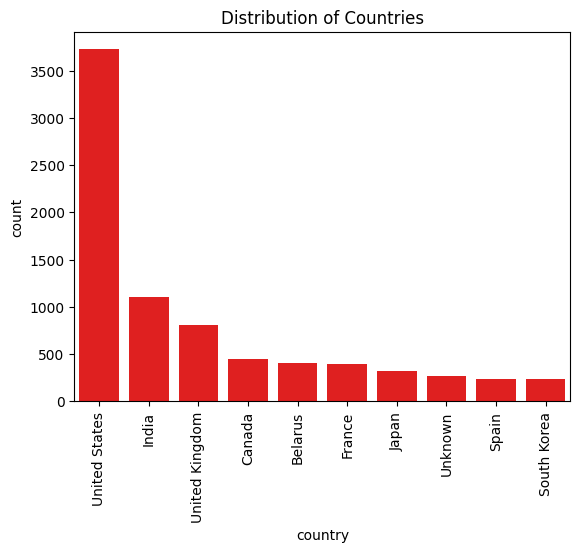

In [ ]:
sns.countplot(data=df_top10,x='country',color='red',order=top10.index)
plt.title('Distribution of Countries')
plt.xticks(rotation=90)
plt.show()

^ **Insights**:The top countries producing movies and TV shows on Netflix are the USA, with a count of 3,725, followed by India with 1,104, and the UK with 808. The USA dominates with a vast number compared to others.

--> Distribution of movies and tvshows duration

In [ ]:
unique_duration=df[['show_id','type','duration']].drop_duplicates()

In [ ]:
movies_d=unique_duration[unique_duration['type']=='Movie']



In [ ]:
tvshows_d=unique_duration[unique_duration['type']=='TV Show']

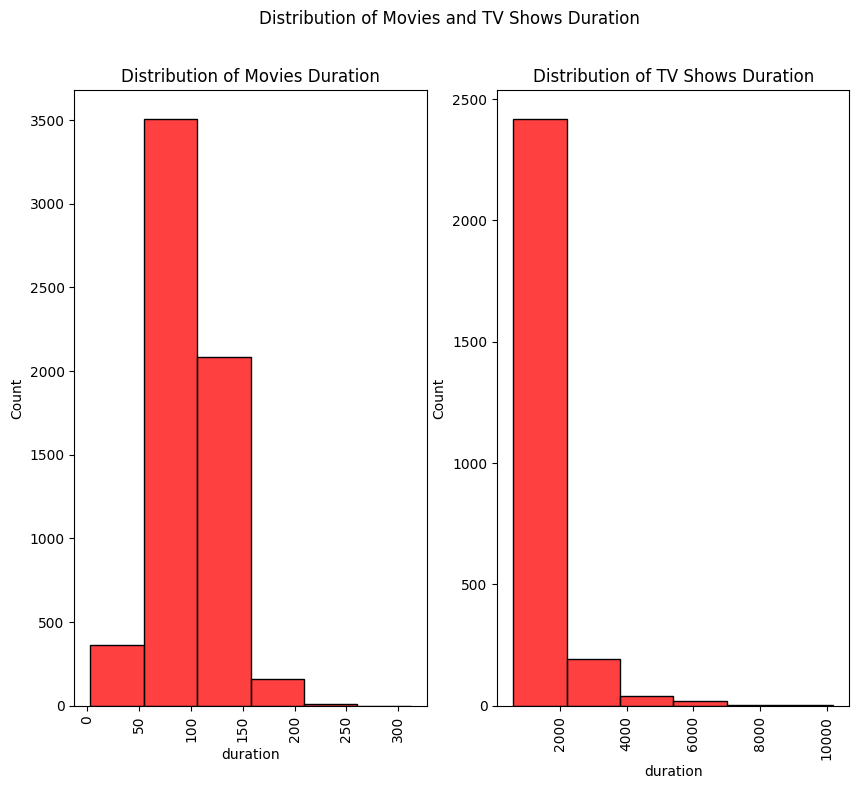

In [ ]:
plt.figure(figsize=(10, 8))
plt.suptitle('Distribution of Movies and TV Shows Duration')

plt.subplot(1, 2, 1)
sns.histplot(data=movies_d, x='duration',bins=6, color='red')
plt.title('Distribution of Movies Duration')
plt.xticks(rotation=90)



plt.subplot(1, 2, 2)
sns.histplot(data=tvshows_d, x='duration',bins=6, color='red')
plt.title('Distribution of TV Shows Duration')
plt.xticks(rotation=90)

plt.show()


^ **Insights**: Here, most movie runtimes lie between 80-160 minutes (1.33-2.67 hours), while TV show runtimes are mostly below 2,200 minutes (36.67 hours).

--> most popular genres in netflix

In [ ]:
unique_df=df[['show_id','type','listed_in']].drop_duplicates()

In [ ]:
top10_genres=unique_df['listed_in'].value_counts().head(10)

In [ ]:
top10_df_tv=unique_df[unique_df['listed_in'].isin(top10_genres.index)]

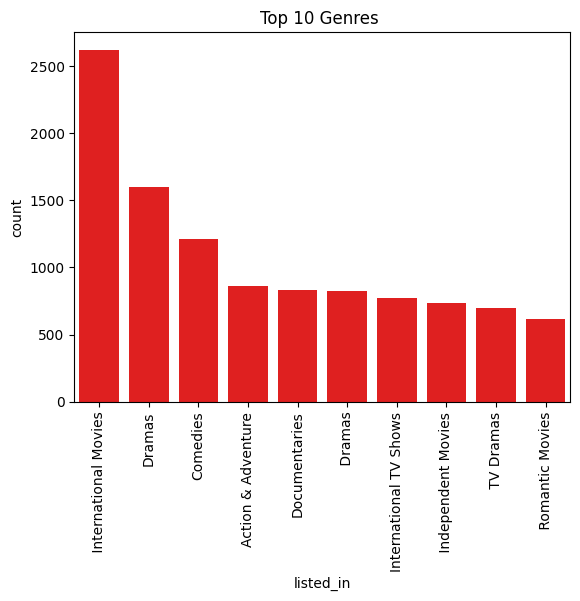

In [ ]:
sns.countplot(data=top10_df_tv,x='listed_in',color='red',order=top10_genres.index)
plt.title('Top 10 Genres ')
plt.xticks(rotation=90)
plt.show()

^**Insights**: The top genres are International Movies, Dramas, Comedies, Action & Adventure, and Documentaries.

--> Distribution of Genre

In [ ]:
movies=unique_df[unique_df['type']=='Movie']

In [ ]:
tvshows=unique_df[unique_df['type']=='TV Show']

In [ ]:
unique_m=movies[['show_id','listed_in']].drop_duplicates()

In [ ]:
top10=unique_m['listed_in'].value_counts().head(10)

In [ ]:
top_10_df=unique_m[unique_m['listed_in'].isin(top10.index)]

In [ ]:
unique_tv=tvshows[['show_id','listed_in']].drop_duplicates()

In [ ]:
top10tv=unique_tv['listed_in'].value_counts().head(10)

In [ ]:
top10_df_tv=unique_tv[unique_tv['listed_in'].isin(top10tv.index)]

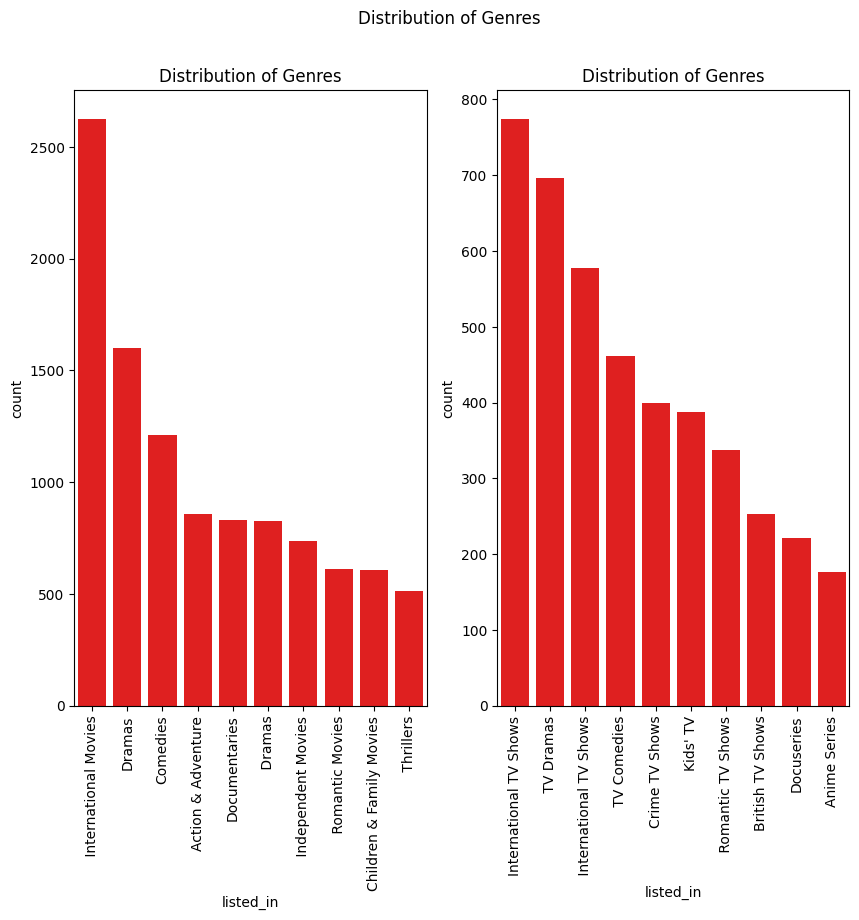

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle('Distribution of Genres')
plt.subplot(1,2,1)
sns.countplot(data=top_10_df,x='listed_in',color='red',order=top10.index)
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(data=top10_df_tv,x='listed_in',color='red',order=top10tv.index)
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

^**Insights** :The top movie genres are International Movies, Dramas, Comedies, Action & Adventure, and Documentaries. The top TV genres are International TV Shows, TV Dramas, TV Comedies, and Crime TV Shows.

--> content released over the years

In [ ]:
unique_year=df[['show_id','release_year']].drop_duplicates()

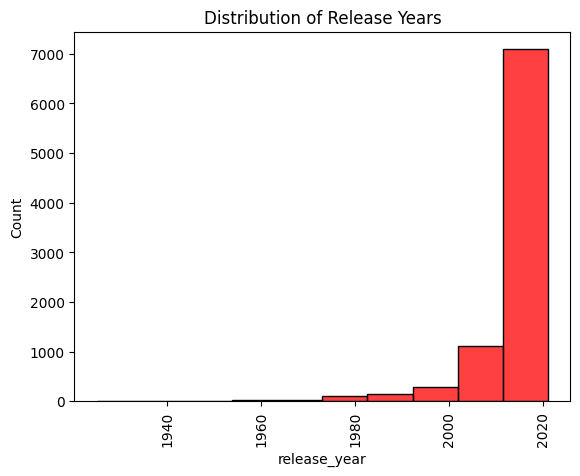

In [ ]:
sns.histplot(x=unique_year['release_year'],bins=10,color='red')
plt.title('Distribution of Release Years')
plt.xticks(rotation=90)
plt.show()

^ **Insights**:We can observe that most of the films that Netflix acquired were released primarily in the past 8-10 years, with the majority being released after 2015.

-->Content added over the years

In [ ]:
unique_year2=df[['show_id','date_added']].drop_duplicates()

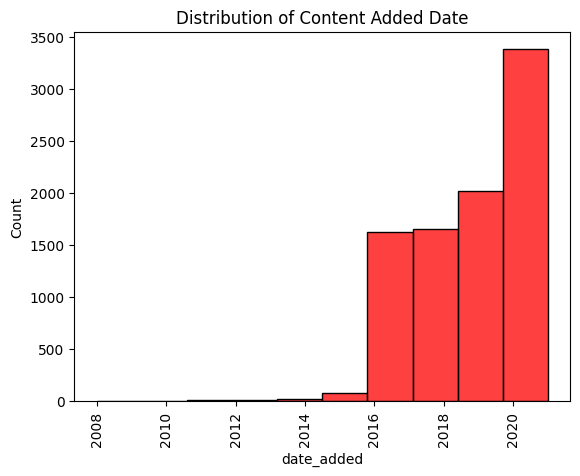

In [ ]:
sns.histplot(x=unique_year2['date_added'].dt.year,bins=10,color='red')
plt.title('Distribution of Content Added Date')
plt.xticks(rotation=90)
plt.show()

^ **Insights**: Most of the content was added after 2014, with a significant increase year by year. There was a rapid rise in the number of content additions after 2019, especially during and after the COVID-19 pandemic.

--> visual summuary of duration is distributed by boxplot

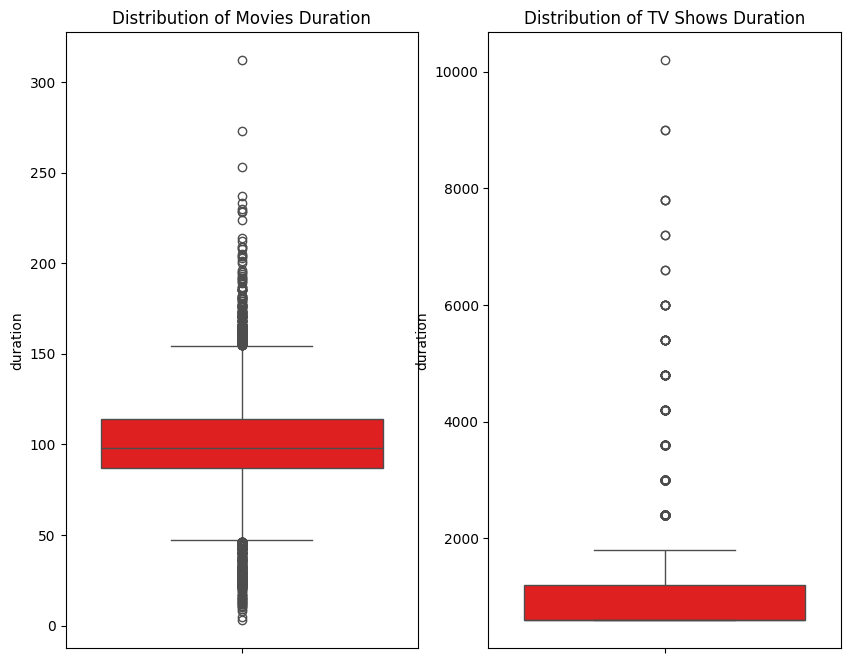

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=movies_d,y='duration',color='red')
plt.title('Distribution of Movies Duration')
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
sns.boxplot(data=tvshows_d,y='duration',color='red')
plt.title('Distribution of TV Shows Duration')
plt.xticks(rotation=90)
plt.show()

^**Insights**: Movies: There are some movies with either very short runtimes (under 30 minutes) or very long runtimes (over 200 minutes). These could be special types of movies, like short films or extended versions.

TV Shows: Some TV shows have very few episodes, while others have a lot. The ones with fewer episodes could be limited series, and the ones with more episodes could be long-running shows.


# Bivariate analysis

--> Distribution of movies vs. TV shows across different countries.

In [ ]:
unique_df=df[['show_id','type','country']].drop_duplicates()

In [ ]:
top_10=unique_df['country'].value_counts().head(10)

In [ ]:
top_10_df=unique_df[unique_df['country'].isin(top_10.index)]

In [ ]:
top_10_df['country'].value_counts()

,count
country,
United States,3725
India,1104
United Kingdom,808
Canada,447
Belarus,410
France,394
Japan,326
Unknown,272
Spain,234


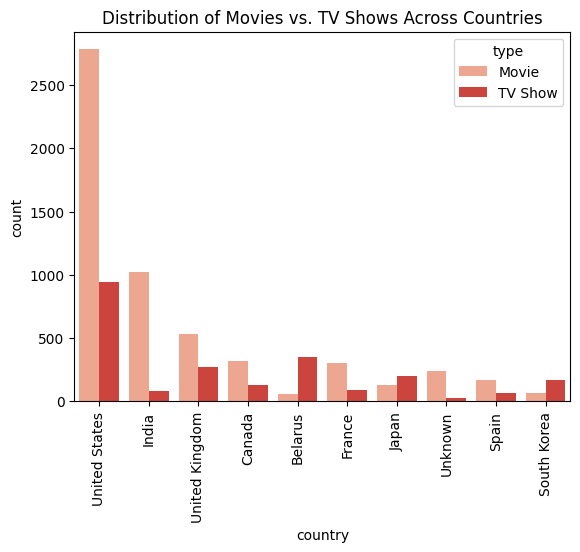

In [ ]:
sns.countplot(data=top_10_df,x='country',hue='type',palette='Reds',order=top_10_df['country'].value_counts().index)
plt.title('Distribution of Movies vs. TV Shows Across Countries')
plt.xticks(rotation=90)
plt.show()

^**Insights**:  USA, India, UK: Movies dominate the content in these countries. These regions produce a larger number of movies compared to TV shows, reflecting their well-established movie industries.

Belarus and Japan: TV shows dominate in these countries. This could be due to local preferences or changing market trends that favor TV shows over movies.

-->How Top 5 ratings differ across different countries.

In [ ]:
movies=df[df['type']=='Movie']

In [ ]:
tvshows=df[df['type']=='TV Show']

In [ ]:
unique_movies=movies[['show_id','duration','rating']].drop_duplicates()

In [ ]:
unique_tvshows=tvshows[['show_id','duration','rating']].drop_duplicates()

In [ ]:
top5_mrating=unique_movies['rating'].value_counts().head(5)

In [ ]:
top5_df_m=unique_movies[unique_movies['rating'].isin(top5_mrating.index)]

In [ ]:
top5_tvrating=unique_tvshows['rating'].value_counts().head(5)

In [ ]:
top5_df_tv=unique_tvshows[unique_tvshows['rating'].isin(top5_tvrating.index)]

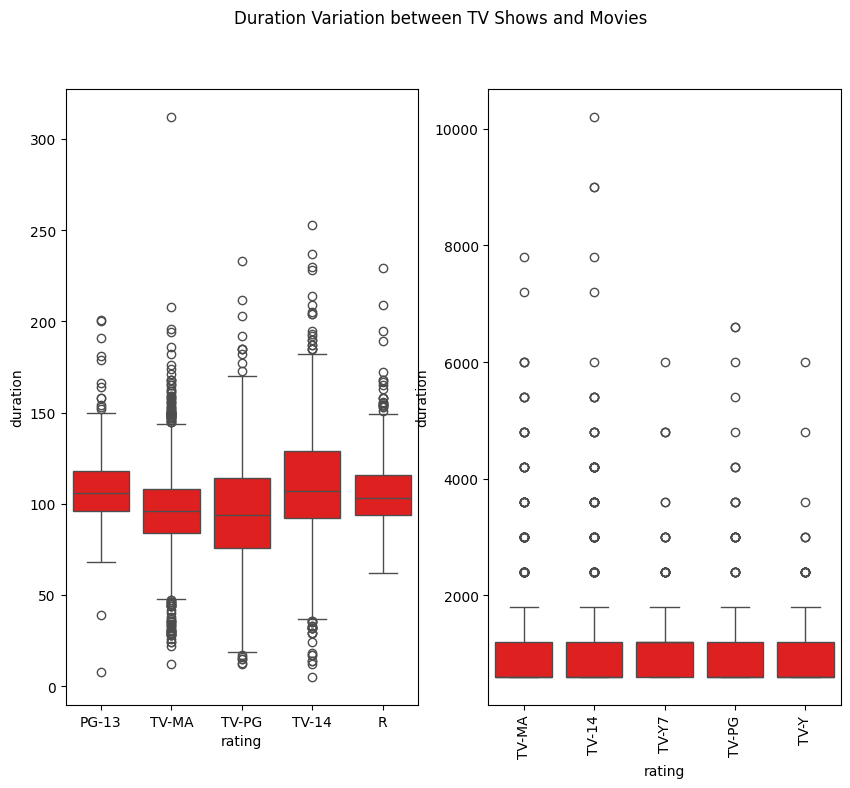

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,8))
sns.boxplot(data=top5_df_m,x='rating',y='duration',color='red',ax=ax1)
sns.boxplot(data=top5_df_tv,x='rating',y='duration',color='red',ax=ax2)
fig.suptitle('Duration Variation between TV Shows and Movies')
plt.xticks(rotation=90)
plt.show()


^**Insights**: From the box plot of movie genres, we see that some movie genres have counts that are much higher or lower than most others. For TV shows, the top 5 genres mostly have counts that are higher than the usual range, meaning these genres are more common or popular compared to the others.

--> Top 10 genre popularity across the top 5 countries.

In [ ]:
unique_df=df[['show_id','listed_in','country']].drop_duplicates()

In [ ]:
top10_c=unique_df['country'].value_counts().head(5)

In [ ]:
top10_g=unique_df['listed_in'].value_counts().head(10)

In [ ]:
top10_df=unique_df[(unique_df['country'].isin(top10_c.index))&(unique_df['country']!='Unknown') & (unique_df['listed_in'].isin(top10_g.index))]

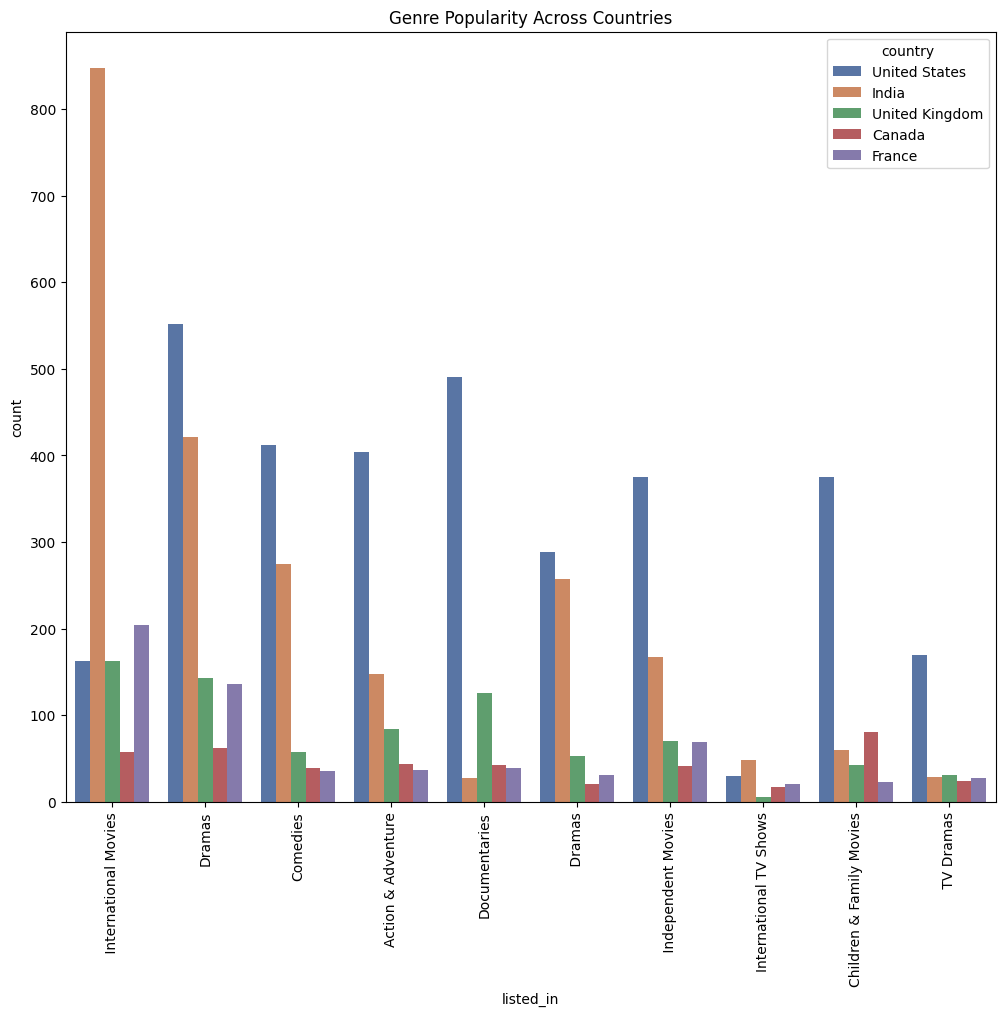

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data=top10_df,x='listed_in',hue='country',palette='deep',order=top10_g.index)
plt.title('Genre Popularity Across Countries')
plt.xticks(rotation=90)
plt.show()


^**Insights**:The count plot shows that India has the highest count for International Movies, while the US dominates in most of the other genres. India usually comes in second, and the UK ranks third across various genres.

-->correlation between Duration , release_year and date added columns

In [ ]:
unique_df=df[['show_id','type','duration','release_year']].drop_duplicates()

In [ ]:
unique_df['release_year']=unique_df['release_year'].dt.year

In [ ]:
moviesc=unique_df[unique_df['type']=='Movie']

In [ ]:
tvshows=unique_df[unique_df['type']=='TV Show']

In [ ]:
df_m=moviesc[['release_year','duration']]

In [ ]:
df_tv=tvshows[['release_year','duration']]

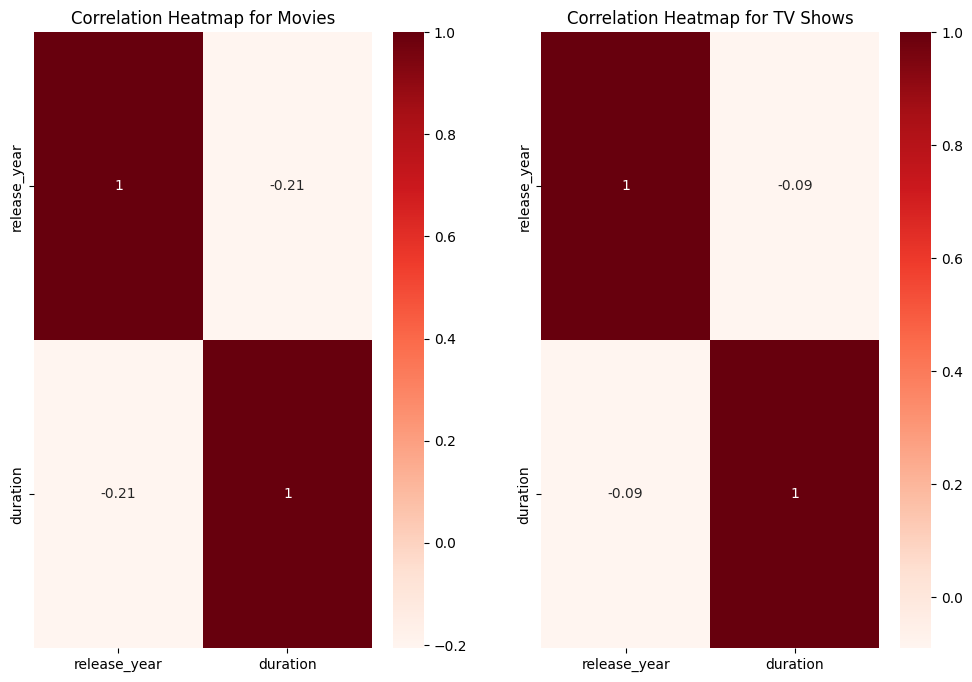

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.heatmap(df_m.corr(),annot=True,cmap='Reds')
plt.title('Correlation Heatmap for Movies')
plt.subplot(1,2,2)
sns.heatmap(df_tv.corr(),annot=True,cmap='Reds')
plt.title('Correlation Heatmap for TV Shows')
plt.show()

^**Insights**: Movies:This weak negative correlation might imply that newer movies on Netflix tend to be slightly shorter in duration. However, the weak value suggests that this relationship is not strong.
  
TV Shows : This weak negative correlation suggests that there isn't much of a relationship between when TV shows were released and how long they are.

--> Pair Plot between duration and release year

In [ ]:
type(df_m['release_year'][0])

numpy.int32

<Figure size 1200x800 with 0 Axes>

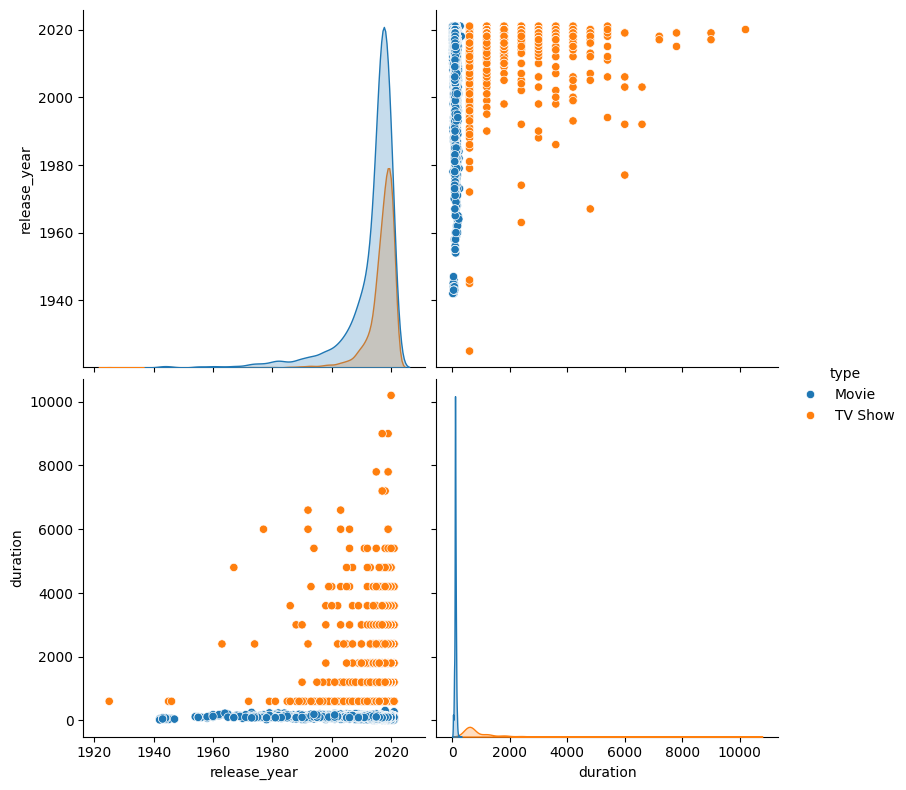

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle('Pair Plot between Duration and Release Year')
sns.pairplot(unique_df,vars=['release_year','duration'],hue='type',height=4)
plt.show()

^ **Insights**:  Movies:The release year and duration of movies don’t show a strong relationship. You might notice that newer movies tend to be slightly shorter, but it’s not a very clear trend.


 TV Shows:For TV shows, there’s almost no relationship between the release year and duration. The durations are pretty spread out, and the year doesn’t seem to affect how long the shows are.

--> Movies vs TV Shows Over the Years (Post 2010)

In [ ]:
unique_df=df[['show_id','type','release_year','date_added']].drop_duplicates()

In [ ]:
unique_df['release_year']=unique_df['release_year'].dt.year

In [ ]:
unique_df['date_added']=unique_df['date_added'].dt.year

In [ ]:
unique_df['release_year']=unique_df['release_year'].astype('int64')

In [ ]:
unique_df['date_added']=unique_df['date_added'].astype('int64')

In [ ]:
recent_years = unique_df[unique_df['release_year'] >= 2010]
tv_vs_movies_recent = recent_years.groupby(['release_year', 'type']).size().unstack()

<ipython-input-238-d1665460daf1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tv_vs_movies_recent = recent_years.groupby(['release_year', 'type']).size().unstack()


In [ ]:
recent_years_content=unique_df[unique_df['date_added']>=2010]
tv_vs_movies_recent_content=recent_years_content.groupby(['date_added','type']).size().unstack()

<ipython-input-239-81c83a571d9e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tv_vs_movies_recent_content=recent_years_content.groupby(['date_added','type']).size().unstack()


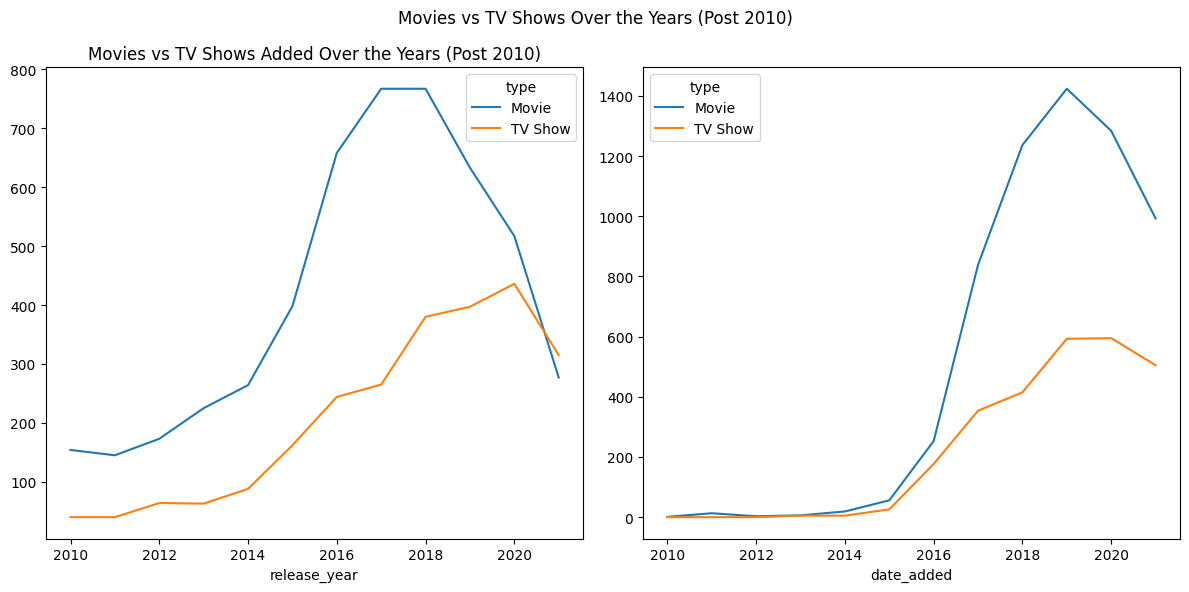

In [ ]:
fig,ax=plt.subplots(1, 2, figsize=(12, 6))


plt.suptitle('Movies vs TV Shows Over the Years (Post 2010)')

tv_vs_movies_recent.plot(kind='line',ax=ax[0])
ax[0].set_title('Movies vs TV Shows Released Over the Years (Post 2010)')


tv_vs_movies_recent_content.plot(kind='line',ax=ax[1])
ax[0].set_title('Movies vs TV Shows Added Over the Years (Post 2010)')

plt.tight_layout()
plt.show()


^**Insights** Duration vs. Release Year:
Movies: Movies dominate in terms of duration, and we can see a trend where they are mostly consistent, with some fluctuations.
TV Shows: TV shows are increasing over time, especially post-2019, likely due to the growth of streaming platforms and the demand for more content.

Duration vs. Date Added:
Movies: Movies have a steady presence in the content library over time.
TV Shows: TV shows have been increasing rapidly after 2019, particularly after the global surge in streaming, which might be linked to the pandemic when more TV shows were produced and added to platforms like Netflix.

-->Number of Movies vs TV Shows Released per Year'

In [ ]:
unique_df=df[['show_id','type','release_year','date_added']].drop_duplicates()

In [ ]:
unique_df['release_year']=unique_df['release_year'].dt.year

In [ ]:
unique_df['date_added']=unique_df['date_added'].dt.year

In [ ]:
recent_dataset=unique_df[(unique_df['release_year']>=2010) & (unique_df['date_added']>=2010)]

In [ ]:
yearly_release = recent_dataset.groupby(['release_year', 'type']).size().unstack()


<ipython-input-245-2b381142863d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_release = recent_dataset.groupby(['release_year', 'type']).size().unstack()


In [ ]:
yearly_added = recent_dataset.groupby(['date_added', 'type']).size().unstack()

<ipython-input-246-8228ace7f187>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_added = recent_dataset.groupby(['date_added', 'type']).size().unstack()


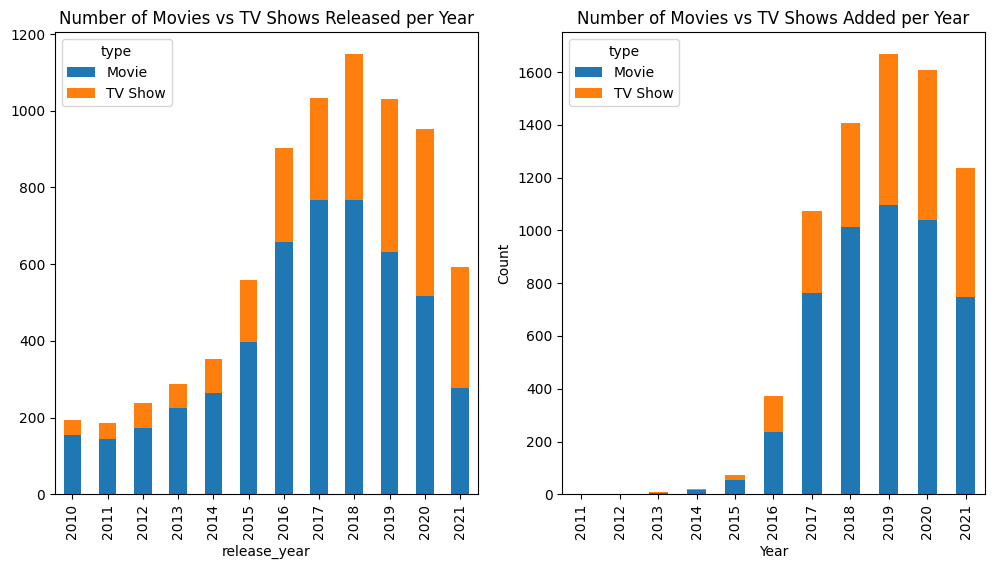

In [ ]:
fig,ax= plt.subplots(1,2,figsize=(12, 6))

yearly_release.plot(kind='bar', ax=ax[0],stacked=True)
ax[0].set_title('Number of Movies vs TV Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)


yearly_added.plot(kind='bar',ax=ax[1], stacked=True)
ax[1].set_title('Number of Movies vs TV Shows Added per Year')
plt.xlabel('Year')
plt.show()


^**Insights**:Release Year and Duration:
Movies were more common: Until 2019, Netflix had more movies than TV shows.
Equal in 2021: In 2021, the number of movies and TV shows with similar durations became almost the same.

Date Added and Duration:
Movies were added more: Before 2019, movies were added in larger numbers.
TV Shows Increased After 2019: After 2019, TV shows started to be added more, with a big jump in 2021.
Equal in 2021: In 2021, Netflix added almost the same number of movies and TV shows

-->Content Added per Month

In [ ]:
unique_df=df[['show_id','type','date_added']].drop_duplicates()

In [ ]:
unique_df['date_added'] = unique_df['date_added'].dt.month

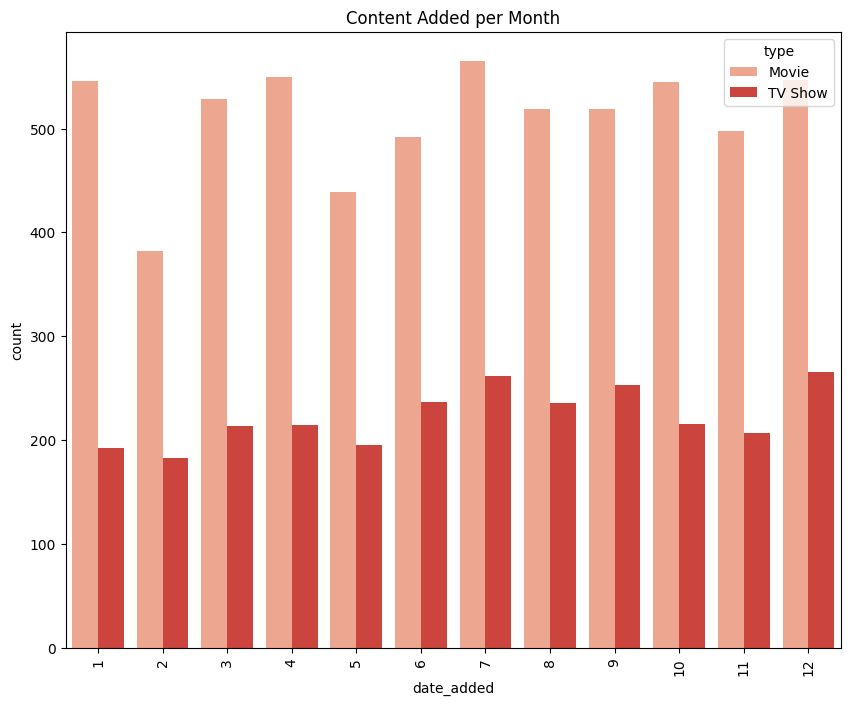

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=unique_df,x='date_added',hue='type',palette='Reds')
plt.title('Content Added per Month')

plt.xticks(rotation=90)
plt.show()


^**Insights**: shows that Netflix adds more content in certain months, with noticeable spikes after 2019, especially post-COVID. This indicates Netflix is adding more content to keep up with growing demand and keep viewers engaged.








-->Top Directors in Movies and TV Shows

In [ ]:
unique_df=df[['show_id','type','director','cast']].drop_duplicates()

In [ ]:
unique_df_m=unique_df[unique_df['type']=='Movie']

In [ ]:
unique_df_tv=unique_df[unique_df['type']=='TV Show']

In [ ]:
top10_m=unique_df_m['director'].value_counts().head(10)


In [ ]:
top10_tv=unique_df_tv['director'].value_counts().head(10)

In [ ]:
top10_df_m=unique_df_m[(unique_df_m['director'].isin(top10_m.index)) & (unique_df_m['director']!='Unknown')]

In [ ]:
top10_df_tv=unique_df_tv[(unique_df_tv['director'].isin(top10_tv.index))  & (unique_df_tv['director']!='Unknown')]

<ipython-input-262-730a1139c456>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top10_df_m['director'].value_counts().index,rotation=45)
<ipython-input-262-730a1139c456>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top10_df_tv['director'].value_counts().index,rotation=45)


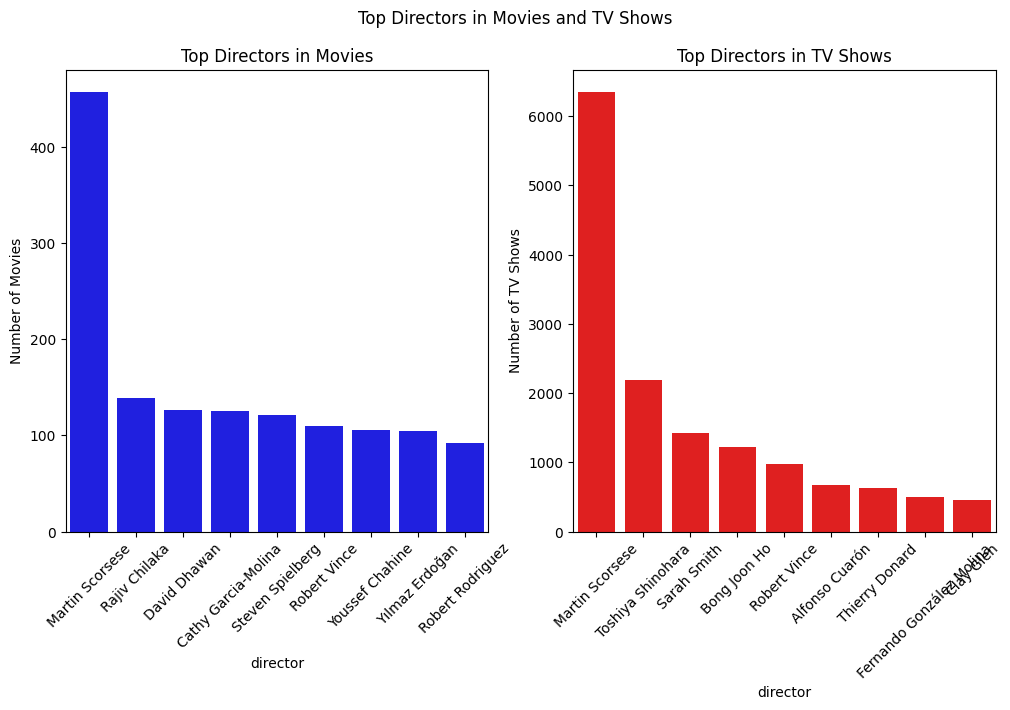

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Top Directors in Movies and TV Shows')
sns.countplot(data=top10_df_m,x='director',ax=ax[0], color='blue',order=top10_df_m['director'].value_counts().index)
ax[0].set_title('Top Directors in Movies')
ax[0].set_ylabel('Number of Movies')
ax[0].set_xticklabels(top10_df_m['director'].value_counts().index,rotation=45)


sns.countplot(data=top10_df_tv,x='director',ax=ax[1], color='red',order=top10_df_tv['director'].value_counts().index)
ax[1].set_title('Top Directors in TV Shows')
ax[1].set_ylabel('Number of TV Shows')
ax[1].set_xticklabels(top10_df_tv['director'].value_counts().index,rotation=45)
plt.show()

^**Insights**:For movies, Martin Scorsese is the most prominent director, with a significant lead in the number of movies, followed by Rajiv Chilaka, David Dhawan, Cathy Garcia-Molina, and Steven Spielberg. This suggests that Martin Scorsese has made a significant contribution to the movie industry on Netflix.

For TV shows, Toshiya Shinohara leads the list, followed by Sarah Smith, Bong Joon Ho, Robert Vince, and Martin Scorsese. Unlike movies, TV shows have a more diverse set of top directors, with Shinohara standing out in the genre.

Overall, Martin Scorsese dominates in movies, but in TV shows, there is more variety, with other directors like Shinohara gaining a strong presence.

-->Top Actors in Movies and TV Shows

In [ ]:
movie_actors=unique_df_m['cast'].value_counts().head(10)
tvshow_actors=unique_df_tv['cast'].value_counts().head(10)

In [ ]:
top10_df_m=unique_df_m[(unique_df_m['cast'].isin(movie_actors.index)) & (unique_df_m['cast']!='Unknown')]
top10_df_tv=unique_df_tv[(unique_df_tv['cast'].isin(tvshow_actors.index)) & (unique_df_tv['cast']!='Unknown')]

<ipython-input-265-4a6232930a9d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top10_df_m['cast'].value_counts().index,rotation=45)
<ipython-input-265-4a6232930a9d>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top10_df_tv['cast'].value_counts().index,rotation=45)


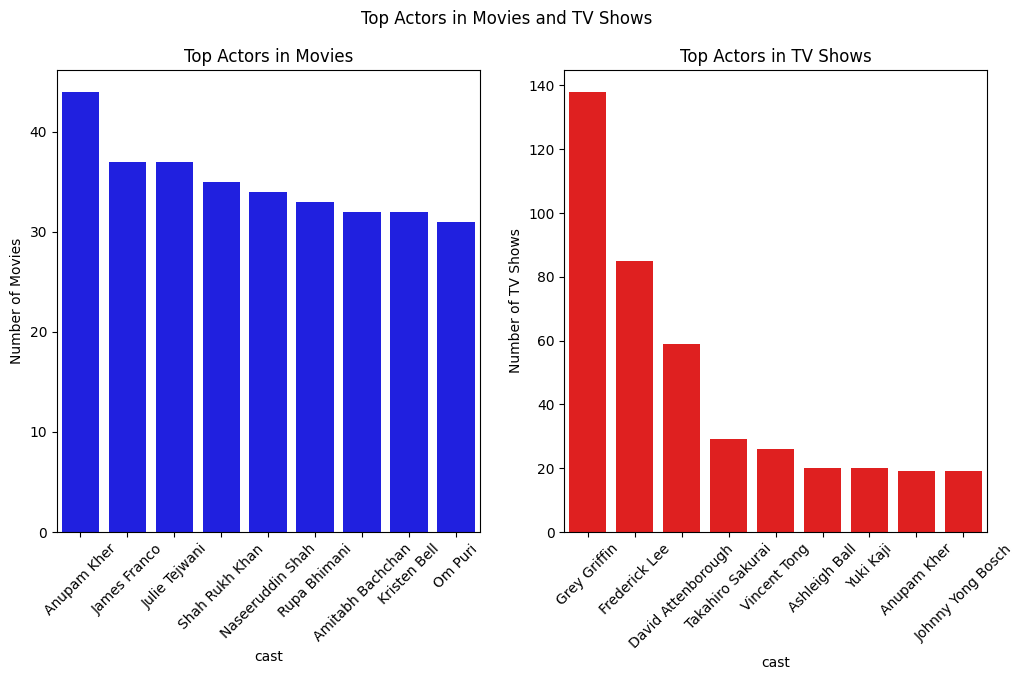

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('Top Actors in Movies and TV Shows')

plt.xticks(rotation=90)
sns.countplot(data=top10_df_m,x='cast',ax=ax[0],color='blue',order=top10_df_m['cast'].value_counts().index)
ax[0].set_title('Top Actors in Movies')
ax[0].set_ylabel('Number of Movies')
ax[0].set_xticklabels(top10_df_m['cast'].value_counts().index,rotation=45)

sns.countplot(data=top10_df_tv,x='cast',ax=ax[1],color='red',order=top10_df_tv['cast'].value_counts().index)
ax[1].set_title('Top Actors in TV Shows')
ax[1].set_ylabel('Number of TV Shows')
ax[1].set_xticklabels(top10_df_tv['cast'].value_counts().index,rotation=45)
plt.show()


^**Insights:**In movies, Anupam Kher appears the most, followed by James Franco, Julie Tejwani, Shah Rukh Khan, and Naseeruddin Shah. This shows a mix of Bollywood and Hollywood actors, with Indian actors having a strong presence in Netflix movies.  

For TV shows, Grey Griffin dominates with a significant lead, followed by Frederick Lee, David Attenborough, Takahiro Sakurai, and Vincent Tong. The presence of voice actors like Grey Griffin and Takahiro Sakurai suggests a strong representation  in TV shows.  

Overall, movies feature more traditional film actors, while TV shows highlight voice actors and documentary narrators.

# **Recomendations:**

Balance Movies & TV Shows:  Movies dominate, but TV shows are growing fast, especially after 2019. Investing more in TV shows can attract more viewers.

Expand in Key Regions:  The USA, India, and the UK lead in content, but countries like Japan and Belarus prefer TV shows. More localized content can help reach a wider audience.

Focus on Popular Genres:  International Movies, Dramas, and Comedies are top movie genres, while TV Dramas and International TV Shows lead for series. Prioritizing these can boost engagement.

Work with Top Creators:  Directors like Martin Scorsese and actors like Anupam Kher have contributed heavily. Collaborating with well-known creators can enhance content appeal.

Add Content Strategically:  Most content was added after 2014, with a big jump post-2019. Planning releases based on trends can maximize viewership.

Optimize Content Length:  Most movies are 80-160 minutes long, while TV shows vary a lot. Understanding what works best can improve viewer experience.

Strengthen Local Productions:  The USA dominates, but India and the UK are also key players. More content from different regions can attract diverse audiences.

Better Recommendations:  With so much content, improving recommendations will help users find what they like faster.

Time Content Releases Well:  Identifying peak months for adding content can help plan better releases and promotions.

Check Content Length Outliers:  Some movies and TV shows are much longer or shorter than usual. Studying these can help understand what works best.

#**Business Insights**

Growing Demand for TV Shows: TV shows have seen significant growth, especially after 2019. Expanding TV content can help retain and attract more viewers.

Regional Content Trends: The USA leads in content production, followed by India and the UK. Increasing investment in regional content, particularly in India, can drive more engagement.

Popular Genres: International Movies, Dramas, and Comedies dominate in movies, while TV Dramas and International TV Shows lead in TV content. Prioritizing these genres can enhance audience retention.

Content Growth Over Time: A major increase in content addition has been observed after 2014, with a sharp rise post-2019. Maintaining a consistent content release strategy is essential for sustained growth.

Influence of Top Creators: Directors like Martin Scorsese and actors like Anupam Kher are highly featured in movies, while Grey Griffin and Frederick Lee are prominent in TV shows. Partnering with popular creators can improve content appeal.

Seasonal Content Trends: Certain months see higher content additions. Aligning new releases with audience engagement patterns can optimize viewership.

Content Duration Preferences: Most movies are between 80-160 minutes, while TV shows typically stay under 2200 minutes (≈37 hours). Offering a mix of short and long-form content can cater to different viewer habits.

Expansion Opportunities: TV shows are more popular than movies in regions like Japan and Belarus. Investing in region-specific content can help Netflix strengthen its global presence.